In [44]:
# same imports and data preprocessing as before:

%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import datasets

x_train = pd.read_csv('xTrain.csv')
x_test  = pd.read_csv('xTest.csv')
y_train = pd.read_csv('yTrain.csv')
y_test  = pd.read_csv('yTest.csv')


from sklearn.preprocessing import OneHotEncoder

y_train_onehot = np.eye(5)[y_train]
y_test_onehot = np.eye(5)[y_test]
 
# additionally we standardise x to have zero mean and unit variance:
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_test = (x_test - np.mean(x_train, axis=0)) / np.std(x_test, axis=0)



/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [45]:
y_train_onehot = np.squeeze(y_train_onehot)
y_test_onehot = np.squeeze(y_test_onehot)


In [88]:
import tensorflow as tf
from tensorflow.keras import models, layers, losses, optimizers, metrics, regularizers

model = models.Sequential()

regularizer = regularizers.L2(0.01)

# create hidden layers in a loop:
neurons_per_layer = [10, 30, 10]
for num_neurons in neurons_per_layer:
    model.add(layers.Dense(num_neurons, 
                            activation=tf.nn.relu, 
                            kernel_regularizer=regularizer)) 

model.add(layers.Dense(5, activation=tf.nn.softmax))

model.build(input_shape=(None,20))  

print(model.summary())

xe_loss = losses.CategoricalCrossentropy(label_smoothing=0.2)

adam_optim = optimizers.Adam(learning_rate = 0.0001)

# compile with this loss, optimizer, and accuracy metric:
model.compile(optimizer=adam_optim, loss=xe_loss, metrics=[metrics.CategoricalAccuracy()])


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 10)                210       
                                                                 
 dense_69 (Dense)            (None, 30)                330       
                                                                 
 dense_70 (Dense)            (None, 10)                310       
                                                                 
 dense_71 (Dense)            (None, 5)                 55        
                                                                 
Total params: 905
Trainable params: 905
Non-trainable params: 0
_________________________________________________________________


None


In [89]:
# train model:
log = model.fit(x_train, y_train_onehot, 
                        batch_size=10, 
                        validation_data=(x_test, y_test_onehot), 
                        epochs=500,
                        verbose=False) 

In [90]:
print('loss: ',log.history['loss'][-1])
print('accuracy: ',log.history['categorical_accuracy'][-1])

loss:  1.2520127296447754
accuracy:  0.7314285635948181


Text(0, 0.5, 'Accuracy')

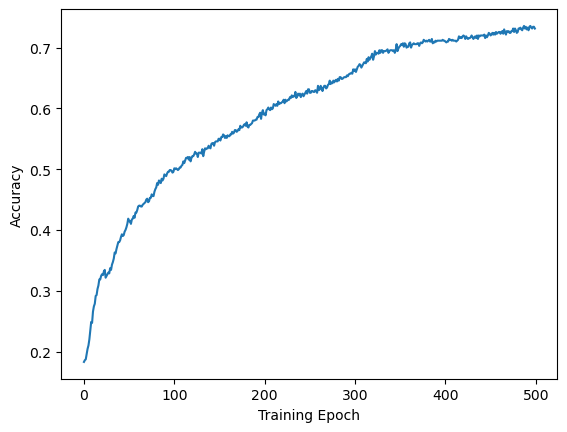

In [91]:
# plot history of the accuracy over time found in the 'log' object:
plt.plot(log.history['categorical_accuracy'])
plt.xlabel('Training Epoch')
plt.ylabel('Accuracy')

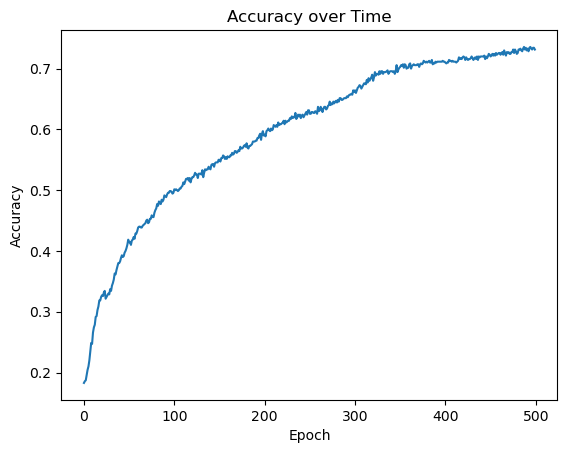

In [92]:
import matplotlib.pyplot as plt

# Extract accuracy values from the log object
accuracy = log.history['categorical_accuracy']

# Plot accuracy over time
plt.plot(accuracy)
plt.title('Accuracy over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [1]:
plt.plot(log.history['loss'])
plt.xlabel('Training Epoch')
plt.ylabel('loss')


NameError: name 'plt' is not defined

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 10)                210       
                                                                 
 dense_125 (Dense)           (None, 30)                330       
                                                                 
 dense_126 (Dense)           (None, 10)                310       
                                                                 
 dense_127 (Dense)           (None, 5)                 55        
                                                                 
Total params: 905
Trainable params: 905
Non-trainable params: 0
_________________________________________________________________


None
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 10)                210       
                                                                 
 dense_129 (Dense)           (None, 30)                330       
                                                                 
 dense_130 (Dense)           (None, 10)                310       
                                                                 
 dense_131 (Dense)           (None, 5)                 55        
                                                                 
Total params: 905
Trainable params: 905
Non-trainable params: 0
_________________________________________________________________


None
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 10)                210       
                                                                 
 dense_133 (Dense)           (None, 30)                330       
                                                                 
 dense_134 (Dense)           (None, 10)                310       
                                                                 
 dense_135 (Dense)           (None, 5)                 55        
                                                                 
Total params: 905
Trainable params: 905
Non-trainable params: 0
_________________________________________________________________


None
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 10)                210       
                                                                 
 dense_137 (Dense)           (None, 30)                330       
                                                                 
 dense_138 (Dense)           (None, 10)                310       
                                                                 
 dense_139 (Dense)           (None, 5)                 55        
                                                                 
Total params: 905
Trainable params: 905
Non-trainable params: 0
_________________________________________________________________


None
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 10)                210       
                                                                 
 dense_141 (Dense)           (None, 30)                330       
                                                                 
 dense_142 (Dense)           (None, 10)                310       
                                                                 
 dense_143 (Dense)           (None, 5)                 55        
                                                                 
Total params: 905
Trainable params: 905
Non-trainable params: 0
_________________________________________________________________


None


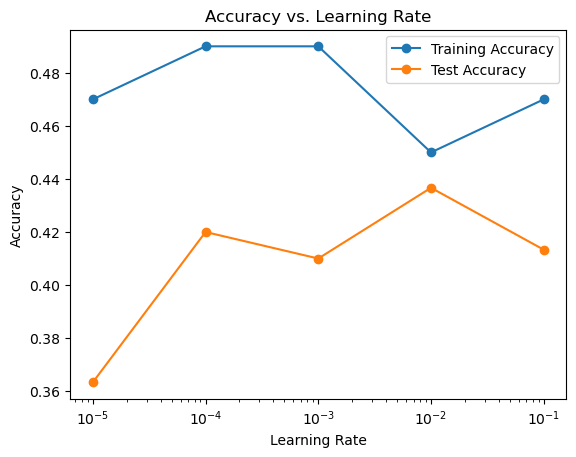

In [96]:
# might want to loop here and save the log object

import matplotlib.pyplot as plt
import numpy as np

learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]  # List of learning rates to try

train_accuracies = []  # List to store training accuracies
test_accuracies = []   # List to store test accuracies

for learning_rate in learning_rates:
    model = models.Sequential()

    regularizer = regularizers.L2(0.01)

    # create hidden layers in a loop:
    neurons_per_layer = [10, 30, 10]
    for num_neurons in neurons_per_layer:
        model.add(layers.Dense(num_neurons, 
                            activation=tf.nn.relu, 
                            kernel_regularizer=regularizer)) 

    model.add(layers.Dense(5, activation=tf.nn.softmax))

    model.build(input_shape=(None,20))  

    print(model.summary())

    xe_loss = losses.CategoricalCrossentropy(label_smoothing=0.2)

    adam_optim = optimizers.Adam(learning_rate = 0.0001)

    # compile with this loss, optimizer, and accuracy metric:
    model.compile(optimizer=adam_optim, loss=xe_loss, metrics=[metrics.CategoricalAccuracy()])

    
    # Train the model
    model.fit(x_train, y_train_onehot, batch_size=10, epochs=50, verbose=0)
    
    # Evaluate the model on training and test sets
    train_acc = model.evaluate(x_train, y_train_onehot, verbose=0)[1]
    test_acc = model.evaluate(x_test, y_test_onehot, verbose=0)[1]
    
    # Store the accuracies
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot the training and test accuracies for each learning rate
plt.plot(learning_rates, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(learning_rates, test_accuracies, label='Test Accuracy', marker='o')
plt.xscale('log')  # Use logarithmic scale for better visualization of learning rates
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate')
plt.legend()
plt.show()